In [81]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px 
import math 
import statistics as st
from collections import Counter
import scipy.stats as sp
import seaborn as sns 


In [82]:
url = 'https://raw.githubusercontent.com/md-lorente/data/master/datos_facturas.csv'
df= pd.read_csv(url, sep = ';',decimal =',')
df.head()

,id,fecha,mes,cliente,factura_pagada,importe_factura,tipo_IVA,porcentaje_IVA,IVA,total_pagado
0,1,01/01/2010,Enero,clienteA,si,100,normal,18,18.0,118.0
1,2,02/01/2010,Enero,clienteB,no,150,normal,18,27.0,177.0
2,3,03/01/2010,Enero,clienteC,si,75,normal,18,13.5,88.5
3,4,04/01/2010,Enero,clienteD,si,200,normal,18,36.0,236.0
4,5,05/01/2010,Enero,clienteA,no,125,normal,18,22.5,147.5


In [ ]:
print(df.info())

**Primeramente identifico el tipo de variables, la clasificación a la que corresponden las variables y identifico el tipo de variables que serían desde el punto de vista del análisis de datos.**

**fecha:**
Variable que se refiere a la fecha de la factura, según la función info es un texto (object).
Clasificación de la variable estadística: es una variable que se recoge de manera numérica, es cuantitativa y continua, puesto que puede tomar un número de valores infinitos.
Análisis de datos: se recoge de manera numérica pero es categórica, ya que no tiene sentido sumar los años o las fechas. Se trata de una variable recogida o expresada de forma numérica cuyo uso es categórico, y se usa para clasificar la información sobre el año/fecha en la que ha ocurrido un suceso.

**mes:**
Variable que se refiere al mes de la factura, según la función info es un texto (object).
Clasificación de la variable estadística: es una variable categórica que no puede ser calculada con números, sino que se clasifica con palabras. Se trata de una variable ordinal ya que sigue un orden o jerarquía (los meses del año de mayor a menor).
Análisis de datos: es una variable categórica. Define una categoría o grupos, los meses del año (mutuamente excluyentes).

**cliente:**
Hace referencia al cliente que ha pagado (o no) las facturas, es un string (object).
Clasificación de la variable estadística: variable categórica, vinculada a una cualidad, que se clasifica con 4 letras (A,B,C,D). Se trata de una variable nominal ya que el tipo de cliente no sigue ningún orden/jerarquía en específico. Las letras A,B,C o D se usan a modo de etiqueta para identificar al tipo de cliente. 
Análisis de datos: es una variable categórica. Define la categoría o grupo en función del tipo de cliente (mutuamente excluyentes).


**factura_pagada:**
Variable que indica si la factura ha sido o no ha sido pagada, según la función info es un texto (object).
Clasificación de la variable estadística: es una variable categórica (vnculada a una cualidad) y se clasifica con palabras (si, no).
Se trata de una variable binaria asimétrica puesto que solo hay 2 opciones (si, no) y en función de cada opción (si o no) se determina la presencia o ausencia de una característica. Para confirmar que solo hay 2 opciones, lo comprobamos con pd.unique(df["factura_pagada"]).
Análisis de datos: es una variable categórica. Indica la categoría en función de si la factura ha sido o no ha sido pagada.


**importe_factura:**
Indica el valor que se ha tenido que pagar por cada factura, según la función info es un número integro.
Clasificación de la variable estadística: se trata de una variable cuantitativa (se puede cuantificar/medir) y continua ya que el importe (precio a pagar) puede tomar un número de valores infinitos.
Análisis de datos: es una variable analítica, se trata de un número que expresa una cantidad de dinero específico.

**tipo_IVA:**
Variable que describe el tipo de IVA de la factura, es un string(object).
Clasificación de la variable estadística: es una variable categórica, vinculada a una cualidad y es clasificada con palabras (normal, reducido). Se trata de una variable binaria simétrica puesto que solo hay 2 opciones (normal , reducido) y estas dos opciones hacen referencia a dos estados cualesquiera. Para asegurarnos de que solo hay 2 opciones, lo comprobamos con pd.unique(df["tipo_IVA"]).
Análisis de datos: es una variable categórica. Define la categoría en función del tipo de IVA aplicado (grupos mutuamente excluyentes).


**porcentaje_IVA**
Valor que indica el porcentage del IVA aplicado, según la función info es un número integro.
Clasificación de la variable estadística: se trata de una variable cuantitativa (se puede medir) y continua, la cual puede tener un número de valores infinitos.
Análisis de datos: es una variable analítica porque expresa una medición.

**IVA**
Indica el IVA aplicado, según la función info es un número float (decimal).
Clasificación de la variable estadística: se trata de una variable cuantitativa (se puede medir) y continua que puede tener un número de valores infinito.
Análisis de datos: variable analítica porque se trata de un número que representa la medición del IVA.

**total_pagado**
Variable que muestra el total pagado por factura, es un número float (decimal).
Clasificación de la variable estadística: es una variable cuantitativa (se mide y es de tipo numérico) y continua que puede tener un número de valores infinitos.
Análisis de datos: hace referencia a una variable analítica que representa una medición, la cantidad de dinero pagado.


In [29]:
#pd.unique(df["cliente"])
#pd.unique(df["tipo_IVA"])
#pd.unique(df["factura_pagada"])


# 1.Indica las medidas de centralización: media, mediana y moda
---
Primeramente es importante destacar que las medidas de centralización nos indican en torno a qué valor del centro se distribuyen los datos.

La **Media aritmetica** es el valor promedio de la distribución. Es 
por tanto, el valor medio obtenido al sumar todos los datos y
dividir el resultado entre el número total de datos. A la media aritmética se la denomina también centro
de gravedad de la distribución. 

La **Mediana** es el valor central de la distribución, es aquel que ocupa el lugar de todos los datos cuando éstos están ordenados de menor a mayor. Es, por tanto, el valor de la variable que separa
la mitad superior de la distribución de la mitad inferior. Así divide la serie de datos en dos partes iguales.

La **Moda** es el valor que más se repite en una distribución. La moda es el valor más frecuente, que tiene mayor frecuencia absoluta.
Se puede hallar la moda tanto para variables cualitativas como para variables cuantitativas.

In [54]:
from numpy.ma.extras import median
from pandas.compat import numpy

#Primeramente creo un dataframe (tp_df) para poder hallar las medidas con la función describe
#de este modo tenemos un overview inicial del tipo de medidas que nos vamos a encontrar y lo 
#podemos calcular y contrastar, a posteriori con los calculos individuales para cada medida 

#Creamos un dataframe total_pagado para los calculos
datos = df['total_pagado'].copy(deep='True')
#En datos extraemos la informacion de la columna total pagado del df principal
datos = datos.sort_values()
tp_df = pd.DataFrame(datos)

print(tp_df['total_pagado'].describe())
#Funcion que nos indica el numero total de valores de la muestra (count)
#la media (mean), la desviacion tipica (std), el valor minimo de la muestra (min), los 3 cuartiles
#y el valor maximo de la muestra (max)

#MEDIA ARITMETICA
media_lista = list(df['total_pagado'])
#Convertimos el objeto total_pagado en una lista 
media = sum(media_lista) / len(media_lista)
print("El centro de gravedad de la distribucion es" , media)
#Conclusion resultado: es importante destacar que la media es muy sensible a las puntuaciones extremas, 
#en este caso considero que la media no es muy representativa de la distribucion
#ya que tenemos una lista de datos muy distantes entre ellos (de 29.5 hasta 236) y considero
#que estas puntuaciones extremas en cierto modo, alteran la media y su capacidad de representacion de la muestra

#MEDIANA
#Paso 1: ordenamos la lista de menor a mayor 
mediana_lista = sorted(media_lista)
#Paso 2: identificar si el número total de elementos de la lista es par o impar
longitud = len(mediana_lista)
longitud
indice = longitud // 2 
if longitud % 2 == 0:
  print('longitud par')
else: 
  print('longitud impar')
  mediana = mediana_lista[indice]

print("La mediana es: " , mediana)
#Conclusion resultado: calculo una mediana para datos sin agrupar, 
#puesto que considero que en esta muestra y para los calculos que
#se nos piden, agrupar los datos no es lo mas idoneo. 
#Una forma de confimar que el calculo de la mediana es correcto, es ver que 
#la mediana coincide con el valor del segundo cuartil (50%).


#MODA
resultado = []
test_list1 = Counter(mediana_lista) 
temp = test_list1.most_common(1)[0][1] 

#Utilizo este bucle para encontrar las 2 modas
for ele in mediana_lista:
  if mediana_lista.count(ele) == temp:
    resultado.append(ele)
resultado = list(set(resultado))
print("Se obtiene una moda bimodal, 2 valores que se repiten el mismo numero de veces: " , resultado)

#Conclusion resultado: 
#Calculo la moda para datos sin agrupar puesto que en este caso es lo que considero mas adecuado.
#Se obtienen dos valores que tienen mayor frecuencia absoluta (moda bimodal).
#Verifico cuantas veces se repiten los dos valores.
resultado = []
test_list1 = Counter(mediana_lista) 
temp = test_list1.most_common(1)[0][1] 
print("Los 2 valores de la moda se repiten" , temp , "veces cada uno de ellos")
#Confirmamos que hay 2 valores 8 veces repetidos (236 y 118).
#Counter devuelve un diccionario de las veces que se repite cada valor dentro de la lista.

count     45.000000
mean     147.308889
std       57.936116
min       29.500000
25%      108.000000
50%      135.000000
75%      189.000000
max      236.000000
Name: total_pagado, dtype: float64
El centro de gravedad de la distribucion es 147.30888888888887
longitud impar
La mediana es:  135.0
Se obtiene una moda bimodal, 2 valores que se repiten el mismo numero de veces:  [236.0, 118.0]
Los 2 valores de la moda se repiten 8 veces cada uno de ellos


# 2-Indica las medidas de dispersión: rango, varianza, desviación típica y coeficiente de variación.
---
Las medidas de dispersión nos informan sobre cuánto se alejan del centro los valores de la distribución

El **Rango o recorrido** es la diferencia entre el mayor y el menor de los datos de una distribución estadística (Xmax - Xmin).

La **Varianza** es la media aritmética del cuadrado de las desviaciones respecto a la media de una distribución estadística.

La **Desviación típica** , también llamada desviación estándar, es la raíz cuadrada positiva de la varianza. 

El **coeficiente de variación de Spearman (CV)** es la relación entre la desviación típica y su media. Esto es, es una medida estadística que ofrece información respecto de la dispersión relativa a un conjunto de datos.



In [51]:
from re import M
#Primero creamos un dataframe total_pagado para los calculos
datos = df['total_pagado'].copy(deep='True')
tp_df = pd.DataFrame(datos)

#RANGO 
maximo_valor = max(mediana_lista)
minimo_valor = min(mediana_lista)
rango = maximo_valor - minimo_valor
print("El rango es: " , rango)
#Conclusion resultado: puesto que los datos son distantes entre si
#tiene sentido que el rango sea un valor elevado, esto indica que hay
#diferencia entre el valor mayor y el menor de los datos 

#VARIANZA
N = len(media_lista)
#la longitud (numero de datos lista) es 45
#tenemos que crear un bucle para la suma 

#Calculo de la varianza
tp_df.var()
print(tp_df.var(ddof=0))
print("La varianza es: " , tp_df.var())
#Conclusion resultado: calculo la varianza para datos sin agrupar.
#La varianza es un indice muy sensible a las puntuaciones extremas,
#tiene sentido que el valor obtenido para la varianza sea elevado,
#ya que las puntuaciones de los datos de nuestra muestra son mas bien extremos, 
#el valor obtenido de varianza es congruente.

#DESVIACION TIPICA 
desviacion = tp_df.std()
print(tp_df.std(ddof=0))
print("La desviacion tipica es: " , tp_df.std())
#Conclusion resultado: la desviacion tipica es un indice muy sensible 
#a las puntuaciones extremas. Obtenemos un valor de desviacion tipica elevado, lo cual indica que la concentracion
#de los datos alrededor de la media es baja. Si hubieramos obtenido un valor desviacion mas pequeño
#la concentracion de datos alrededor de la media hubera sido mayor 


#COEFICIENTE DE VARIACION 
"""Es la relación entre la desviación típica y su media. 
Es una medida estadística que ofrece información respecto de la dispersión relativa a un conjunto
de datos."""

coeficiente_var = desviacion/media
print("El coeficiente de variacion es:" , coeficiente_var)
#Conclusion resultado:
#Se obtiene un C.V  del 39% (menor al 80%). 
#Si nos ceñimos a la teoria esto significa que la media aritmetica es representativa
#del conjunto de datos y es un conjunto de datos homogeneo.Sin embargo, me gustaria destacar
#que se obtiene un C.V del 39%, puede que segun la teoria, con este valor de C.V la media si sea representativa del 
#conjunto de datos. Sin embargo, puesto que los datos son muy distantes entre ellos, 
#puede que hayan muestras de datos con medias mas representativas.
#A mayor dispersión mayor coeficiente de variacion. 
#Mi pregunta es: ¿Quizas el limite del C.V del 80% para definir si los valores son homogeneos vs heterogeneos 
#es un % demasiado elevado y se deberia establecer un limite mas bajo (por ejemplo 40%) para confirmar
#si la media aritmetica es o no representativa del conjunto de datos?

El rango es:  206.5
total_pagado    3282.002588
dtype: float64
La varianza es:  total_pagado    3356.593556
dtype: float64
total_pagado    57.288765
dtype: float64
La desviacion tipica es:  total_pagado    57.936116
dtype: float64
El coeficiente de variacion es: total_pagado    0.393297
dtype: float64


# 3-Indica las medidas de posición: rango intercuartílico, cuartil primero y decil 3. ¿Cuál es la factura que tiene como mínimo el 10% del total pagado de las facturas?
---
Las medidas de posición nos informan de dónde se alejan del centro los valores de la distribución. Para hacerlo, dividen un conjunto de datos en grupos con el mismo número de individuos. Para calcular las
medidas de posición es necesario que los datos estén ordenados de menor a mayor.

El **Rango intercuartílico** es la diferencia entre el tercer y el primer cuartil (Q3 - Q1).

Los **Cuartiles** son los que dividen la serie de datos en cuatro partes iguales. Es decir, son los tres valores de la variable que dividen un conjunto de datos ordenados en cuatro partes iguales. Determinan los valores correspondientes al 25%, al 50% y al 75% de los datos. El cuartil segundo coincide con la mediana.

Los **Deciles** son los que dividen la serie de datos en diez partes iguales. Es decir, son los nueve valores que dividen la serie de datos en diez partes iguales. Los deciles dan los valores correspondientes al 10%, al 20%... y al 90% de los datos. El decil quinto coincide con la mediana.



In [59]:
#Creamos un dataframe total_pagado para los calculos
datos = df['total_pagado'].copy(deep='True')
datos = datos.sort_values()
tp_df = pd.DataFrame(datos)

#CALCULO DE LOS CUARTILES 
CV2 = math.ceil(2*N/4) -1
#en CV2 calculamos la posicon dentro de la lista que va a tener el cuartil 2
#-1 para ajustar el rango y que inicie en 0

Q2 = mediana_lista[CV2] 
Q1 = st.median(mediana_lista[:CV2])
Q3 = st.median(mediana_lista[CV2:])
print("El valor del cuartil 1 es: " , Q1)

#Explicacion del calculo: calculo los cuartiles de los datos sin agrupar.
#Utilizo la lista de datos ordenados de menor a mayor (mediana_lista).

#RANGO INTERCUARTILICO 
RC = Q3 - Q1
print("El rango intercuartilico es: " , RC)

#DECIL 3
D3 = np.percentile(mediana_lista, 30, interpolation = 'midpoint')
D1 = np.percentile(mediana_lista, 10, interpolation = 'midpoint')
D5 = np.percentile(mediana_lista, 50, interpolation = 'midpoint')
print("El valor del decil 5 es: " , D5)
print("El valor del decil 3 es: " , D3)

#Conclusion del resultado: confirmo que los calculos de los deciles son correctos
#puesto que el decil 5 coincide con la mediana 

###¿Cuál es la factura que tiene como minimo el 10% del total pagado de las facturas?
#Nos estan preguntando por el percentil 90 
p90 = np.percentile(mediana_lista, 90, interpolation = 'midpoint')
print("El percentil 90 es: " , p90)

#El resultado es que el percentil 90 muestra la factura que tiene como minimo
#el 10% del total pagado de las facturas, es decir, el 90% de las facturas cumple 
#la condicion. El percentil 90 corresponde con el valor 236, las facturas
#que tienen un total pagado de 236 € tienen como minimo el 10% del total pagado de las facturas.


El valor del cuartil 1 es:  108.0
El rango intercuartilico es:  81.0
El valor del decil 5 es:  135.0
El valor del decil 3 es:  118.0
El percentil 90 es:  236.0


4-Indica las medidas de concentración y forma: curtosis, asimetría y un gráfico.
---

También llamadas medidas de distribución. Estas medidas nos informan sobre cómo se alejan del centro los valores de la distribución. Cada medida de concentración genera una "forma" característica de la
distribución.

La **Curtosis o apuntamiento** indica cómo están de concentrados los valores en la gráfica. En él se estudia la distribución de frecuencias en la zona central. El apuntamiento se mide respecto de la campana de Gauss, que es unimodal y simétrica. Dicho de otra manera, el apuntamiento se compara con la campana de Gauss, por tanto se compara con una distribución que cumple la propiedad: Media = Mediana = Moda.  

La **Asimetría** indica cómo de simétrica es la gráfica. Se halla a través del Coeficiente de Asimetría de Fisher (CAF) también se puede ver la forma que tiene la distribución gráficamente, observando el
comportamiento que tiene el eje de la distribución con respecto a la media aritmética. Evaluando la proximidad o lejanía de los datos con respecto a la media.


La curtosis de Fisher es:  total_pagado   -0.938244
dtype: float64
La curtosis de Fisher con el calculo 2 es:  -0.8434624840832035
La curtosis de Pearson es:  total_pagado    2.061756
dtype: float64
2.1565375159167965
La asimetria es :  total_pagado    0.090108
dtype: float64
0.09319685759185271
AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


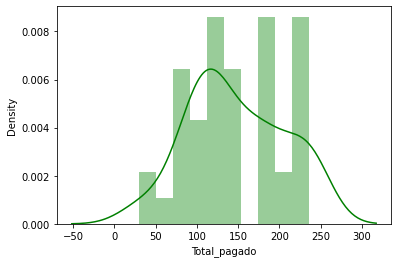

In [60]:
#CURTOSIS
suma2 = 0
for xi in mediana_lista:
  suma2 += ((xi - media)**4) 

curtosis_fisher = ((suma2)/(N*desviacion ** 4)) - 3 
curtosis_pearson = ((suma2)/(N*desviacion ** 4))

#CURTOSIS DE FISHER
print("La curtosis de Fisher es: " , curtosis_fisher)
print("La curtosis de Fisher con el calculo 2 es: " , sp.kurtosis(mediana_lista, fisher = True))

#CURTOSIS DE PEARSON
print("La curtosis de Pearson es: " , curtosis_pearson)
print(sp.kurtosis(mediana_lista, fisher = False)) #pearson
#si Fisher es false por defecto es curtosis de Pearson

#ASIMETRIA O SESGO 
suma3 = 0 
for ki in mediana_lista:
  suma3 += ((ki - media)**3) 
asimetria = suma3 / (N* desviacion**3)
print("La asimetria es : " , asimetria)

print(sp.skew(mediana_lista)) 
#con esta funcion comprobamos 

grafico1= sns.distplot(mediana_lista , bins=10 , axlabel = "Total_pagado" , color = "green")
print(grafico1)


# Conclusiones del gráfico distplot

El gráfico hace referencia a la distribucion de los datos, se obtiene un gráfico de campana ligeramente asimetrica y verificamos que la información es coeherente.
Usamos la funcion distplot de la biblioteca seaborn para realizar el gráfico. El resultado obtenido es una gráfica en la que se observa una curva de asimetría positiva, puesto que el valor calculado es positivo, aunque es cercano a 0 y por lo tanto no presenta una asimetria muy destacada.


Calcuamos 2 tipos de curtosis, segun el método de Pearson y Fisher (-0.84). Según el valor obtenido con el metodo de Fisher (-0.84) la curtosis es Platicúrtica, lo cual nos indica que hay menos concentración en los valores centrales de la variable. Esto nos confirma que los valores son distantes entre ellos y es congruente con los valores de varianza y desviación típica obtenidos. Estos tres valores (curtosis, varianza y desviación típica) nos confirman que la concentración de los valores alrededor de la media es baja.

Adicionalmente calculamos la curtosis con la formula de Pearson y nos da como resultado una curtosis Leptocurtica (más concentración en los valores centrales). Considero que para este ejercico el cálculo de la curtosis más adecuado és el que utiliza la fórmula de Fisher, ya que hemos comprobado que la concentración de los valores alrededor de la media es baja y por lo tanto hay poca concentración en los valores centrales. También es importante destacar que estamos hallando la asimetria con el Coeficiente de Asimetría de Fisher (CAF).


# 5-Realiza un análisis rápido con box-plot y sus medidas.

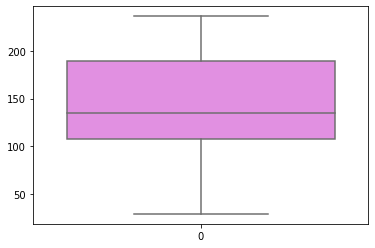

In [ ]:
#GRAFICO BOXPLOT
grafico2= sns.boxplot(data = mediana_lista , color = "violet")


# Conclusiones del gráfico boxplot

Utilizamos el gráfico de boxplot para recoger las medidas de dispersión y de centralización. En este se muestran 5 valores relevantes: el valor minimo (29.5), el valor máximo (236), y los 3 cuartiles. 
Whisker indica la distancia/dispersión que hay des del valor minimo (29.5) hasta Q1 y des del valor del Q3 hasta el valor mayor de los datos (236). Podemos destacar que no hay valores atípicos (outliers) en los datos que estamos analizando.
Otro valor relevante que se puede observar en el gráfico de boxplot es el RC (rango intercuartilico), es decir donde se ubica  el 50% de los datos de la muestra (Q3-Q1).
Concluimos que los datos visualizados en el gráfico boxplot indican que la dispersión entre ellos es media. 


# 6 - Analiza los resultados e informa de quién es el cliente que ha pagado más en todas las facturas.

Total pagado cliente A:  1534.0
Total pagado cliente B:  924.0
Total pagado cliente C:  584.5
Total pagado cliente D:  1534.0


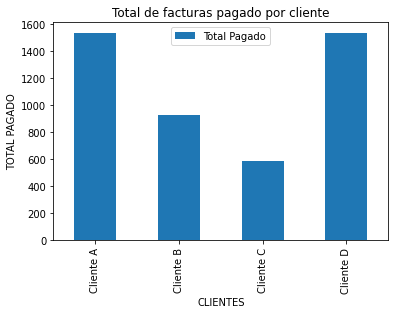

In [71]:
data6 = df['cliente'].copy(deep='True')
tpc_df = pd.DataFrame(data6)
tpc_df['Total_pagado'] = df['total_pagado'].copy(deep='True')
tpc_df['Factura_pagada'] = df['factura_pagada'].copy(deep='True')

groups = tpc_df.groupby(tpc_df.cliente)
clienteA = groups.get_group("clienteA")
clienteB = groups.get_group("clienteB")
clienteC = groups.get_group("clienteC")
clienteD = groups.get_group("clienteD")

clientes = ["clienteA" , "clienteB" , "clienteC" , "clienteD"]

grupo31 = clienteA.groupby(clienteA.Factura_pagada)
df_clienteA = grupo31.get_group("si")
grupo32 = clienteB.groupby(clienteB.Factura_pagada)
df_clienteB = grupo32.get_group("si")
grupo33 = clienteC.groupby(clienteC.Factura_pagada)
df_clienteC = grupo33.get_group("si")
grupo34 = clienteD.groupby(clienteD.Factura_pagada)
df_clienteD = grupo34.get_group("si")

totalA = df_clienteA['Total_pagado'].sum()
totalB = df_clienteB['Total_pagado'].sum()
totalC = df_clienteC['Total_pagado'].sum()
totalD = df_clienteD['Total_pagado'].sum()

print("Total pagado cliente A: " , totalA)
print("Total pagado cliente B: " , totalB)
print("Total pagado cliente C: " , totalC)
print("Total pagado cliente D: " ,totalD)

#crear un nuevo df a partir de los df que ya tenemos 
data_cliente = pd.DataFrame(
    {'Cliente': ['Cliente A','Cliente B','Cliente C','Cliente D'],
     'Total Pagado': [totalA,totalB,totalC,totalD]
     }
)

data_cliente.plot.bar(x='Cliente', y='Total Pagado', rot=90, title='Total de facturas pagado por cliente', xlabel='CLIENTES', ylabel= 'TOTAL PAGADO')
plt.show()


# Conclusiones del gráfico de barras 
Para saber cual es el cliente que más ha pagado en todas la facturas primero agrupo por clientes, luego filtro por las facturas si pagadas y finalemnte sumo el total pagado.
Los datos nos muestran que el cliente A y D son quienes mas han 
pagado en todas las facturas (1534) y el cliente C es quien ha pagado menos (584.5).


# 7 -Quién es el cliente que más facturas no ha pagado en el mes de febrero?

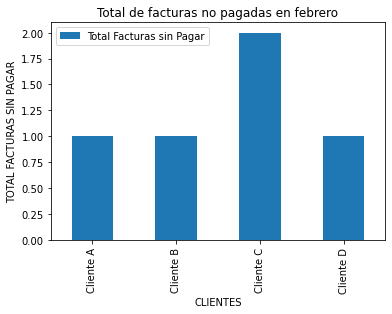

In [72]:
dat2 = df['mes'].copy(deep='True')
mcfp_df = pd.DataFrame(dat2)
mcfp_df['Clientes'] = df['cliente'].copy(deep='True')
mcfp_df['Factura_Pagada'] = df['factura_pagada'].copy(deep='True')

groupo1 = mcfp_df.groupby(mcfp_df.mes)
df_febrero = groupo1.get_group("Febrero")

grupo2 = df_febrero.groupby(df_febrero.Clientes)
dfclienteA = grupo2.get_group("clienteA")
dfclienteB = grupo2.get_group("clienteB")
dfclienteC = grupo2.get_group("clienteC")
dfclienteD = grupo2.get_group("clienteD")

grupo31 = dfclienteA.groupby(dfclienteA.Factura_Pagada)
df_clienteA = grupo31.get_group("no")
grupo32 = dfclienteB.groupby(dfclienteB.Factura_Pagada)
df_clienteB = grupo32.get_group("no")
grupo33 = dfclienteC.groupby(dfclienteC.Factura_Pagada)
df_clienteC = grupo33.get_group("no")
grupo34 = dfclienteD.groupby(dfclienteD.Factura_Pagada)
df_clienteD = grupo34.get_group("no")

tA = len(df_clienteA.index)
tB = len(df_clienteB.index)
tC = len(df_clienteC.index)
tD = len(df_clienteD.index)

data_cliente2 = pd.DataFrame(
    {'Cliente': ['Cliente A','Cliente B','Cliente C','Cliente D'],
     'Total Facturas sin Pagar': [tA,tB,tC,tD]
     }
)

data_cliente2.plot.bar(x='Cliente', y='Total Facturas sin Pagar', rot=90, title='Total de facturas no pagadas en febrero', xlabel='CLIENTES', ylabel= 'TOTAL FACTURAS SIN PAGAR')
plt.show()



# Conclusiones del gráfico de barras
En el gráfico se observa claramente que el cliente C es el que tiene más facturas no pagadas en febrero (2) en contraste con los clientes A, B y D que tienen 1 factura sin pagar en el mes de febrero.

# 8- Crea un gráfico que represente el total pagado de las facturas respecto del IVA aplicado. / 9-Determina el valor de la covarianza de ambas variables. 

[29.5, 32.4, 59.0, 88.5, 108.0, 118.0, 135.0, 147.5, 177.0, 189.0, 206.5, 236.0]
[1, 1, 1, 6, 4, 8, 2, 4, 6, 2, 2, 8]


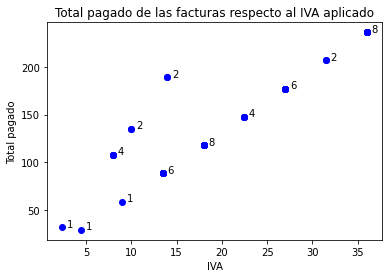

La covarianza es  515.0628345679012


In [78]:
plt.title("Total pagado de las facturas respecto al IVA aplicado")
plt.xlabel("IVA")
plt.ylabel("Total pagado")

x = list(df['IVA'].values)
y = list(df['total_pagado'].values)
plt.scatter(x, y, c='blue')

xn = list(sorted(set(x)))
yn = list(sorted(set(y))) 
test = list(sorted(y))
test_l = Counter(test)
tex = []
for ind in yn:
  tex.append(test_l[ind])
print(yn) 
print(tex)  
ynn = [32.4,29.5,108.0,59.0,135.0,88.5,189.0,118.0,147.5,177.0,206.5,236.0]
text = [1,1,4,1,2,6,2,8,4,6,2,8]
for i in range(len(xn)):
    plt.annotate(text[i], (xn[i]+0.5, ynn[i]+0.5)) 
plt.show()

array1 = np.array(df['IVA'])
array2 = np.array(df['total_pagado'])
covariance = np.cov(array1, array2, ddof=0)[0][1]
print("La covarianza es " , covariance)


# Conclusiones del diagrama de dispersión y de la covarianza
Los datos del diagrama de dispersión (distribución bidimensional) indican varios aspectos relevantes. En primer lugar, cada punto representa una observación, es decir en cada punto del gráfico se observa la coincidencia de los valores X e Y. En nuestro gráfico analizamos cuantas facturas del total pagado tienen un mismo IVA. 
Se puede ver una dependencia positiva puesto que la curva es ascendente. Es decir, a mayor valor de total pagado mayor será el valor del IVA, lo cual tiene sentido, ya que los productos más caros generalmente son los que tienen un IVA superior y viceversa. No obstante, es relevante destacar las excepciones que se visualizan en este gráfico. El total pagado de algunos valores es bastante elevado y en cambio tienen un IVA inferior comparado con la mayoría de los datos. 

El valor obtenido de la **covarianza** para ambas variables es de 515.06.
La covarianza es el momento centrado más importante en estadística bidimensional. Es importante destacar que obtenemos una covarianza de signo positivo lo cual implica una relación directa entre las 2 variables. Concluyo que el resultado de la covarianza es congruente con los datos que se visualizan en el diagrama de dispersión, ya que en ambos se confirma la relación directa y positiva de ambas variables (IVA y total pagado).
